# Parking Log Data Analysis

In [1]:
import sqlite3
import pandas
from pandas import DataFrame
import matplotlib.pyplot as pyplot

In [2]:
connection_string :str = "../db.sqlite3"
#get all parking lot logs and parking lot names from the database
sql:str = "SELECT * FROM PerfectParking_parkinglotlog"
sql:str = "SELECT * FROM PerfectParking_parkinglotlog A INNER JOIN PerfectParking_parkinglot B ON A.parking_lot_id = B.id"

In [3]:
connection = sqlite3.connect(connection_string)
dataframe: DataFrame =pandas.read_sql_query(sql, connection)
connection.close()

In [4]:
dataframe.head()

,id,free_parking_spaces,time_stamp,logged_by_monitor_id,parking_lot_id,id,name,address,hours,isPaidParking,latitude,image,parking_spaces,longitude
0,1,3,2023-08-16 19:53:15.525178,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752
1,2,3,2023-08-16 19:53:19.249673,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752
2,3,3,2023-08-16 19:53:19.664685,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752
3,4,3,2023-08-16 19:53:20.025721,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752
4,5,3,2023-08-16 19:53:20.466446,1,1,1,Henry Street Left Strip,Henry Street,"Paid 09- 17, 2hr limit",1,52.663797,images/parking-lot/henry-street-left-strip-1_M...,3,-8.628752


In [5]:
dataframe['time_stamp'] = pandas.to_datetime(dataframe['time_stamp'])
dataframe['hour'] = dataframe['time_stamp'].dt.hour


## Visualize the parking lot logs by hour

(array([12., 10., 12., 12.,  9., 11., 13., 16., 12., 10.,  7., 19., 18.,
        20., 13.,  9., 10., 11.,  9., 91., 14., 11., 12., 10.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

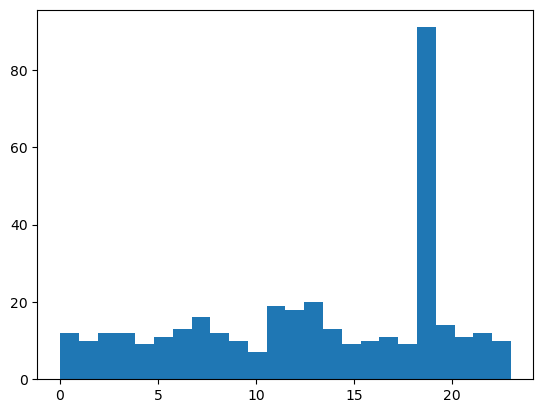

In [6]:
pyplot.style.use('seaborn-whitegrid') # nice and clean grid
pyplot.hist(dataframe['hour'], bins=24)

# Visualize the busiest parking lots 


(array([154.,   0.,  73.,   0.,  72.,  72.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <BarContainer object of 6 artists>)

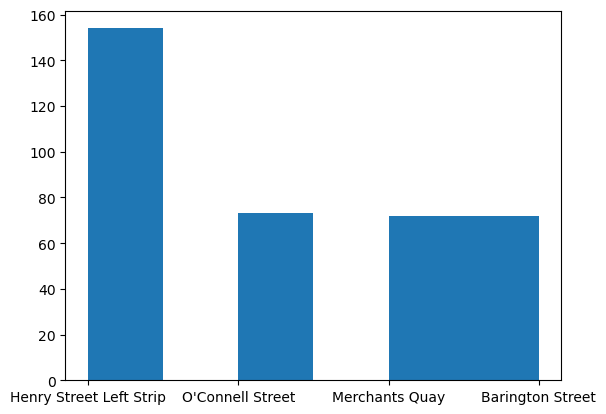

In [7]:
pyplot.hist(dataframe['name'], bins=6)